In [131]:
import matplotlib.pyplot as plt
import mxnet
from mxnet import nd, autograd, gluon

In [132]:
def generate_data(w, b, num):
    X = nd.random.normal(scale=1, shape=(num,w.shape[0]))
    y = nd.dot(X, w) + b
    y += nd.random.normal(scale=0.01, shape=y.shape)
    return X, y

In [133]:
def data_loader(arrs, batch_size, shuffle=True):
    array_dataset = gluon.data.ArrayDataset(*arrs)
    return gluon.data.DataLoader(array_dataset, batch_size=batch_size, shuffle=shuffle)

In [134]:
def plotter(X, y):
    plt.scatter(X[:, 0], y, 1)
    plt.show()

In [135]:
def get_model():
    net = gluon.nn.Sequential()
    net.add(gluon.nn.Dense(1))
    net.initialize(mxnet.init.Normal(0.01))
    return net

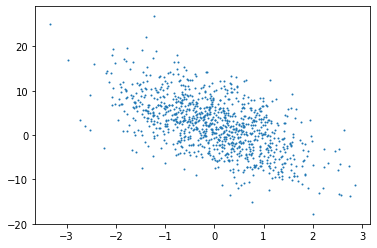

In [136]:
true_w = nd.array([-3.4, 5])
true_b = nd.array([2.2])
batch_size = 10

train_data = generate_data(true_w, true_b, 1000)
plotter(train_data[0].asnumpy(), train_data[1].asnumpy())

In [137]:
net = get_model()
loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate':0.03})
data_iter = data_loader(train_data, batch_size)

In [140]:
epochs = 10
for epoch in range(epochs):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    epoch_loss = loss(net(train_data[0]),train_data[1])
    print("Epoch %f loss %f" % (epoch, epoch_loss.mean().asnumpy()))

Epoch 0.000000 loss 0.000049
Epoch 1.000000 loss 0.000049
Epoch 2.000000 loss 0.000049
Epoch 3.000000 loss 0.000050
Epoch 4.000000 loss 0.000050
Epoch 5.000000 loss 0.000050
Epoch 6.000000 loss 0.000049
Epoch 7.000000 loss 0.000049
Epoch 8.000000 loss 0.000049
Epoch 9.000000 loss 0.000050


In [141]:
w = net[0].weight.data()
b = net[0].bias.data()
print("Error in w:", w-true_w)
print("Error in b", b-true_b)

Error in w: 
[[ 8.4233284e-04 -6.5326691e-05]]
<NDArray 1x2 @cpu(0)>
Error in b 
[-0.00044847]
<NDArray 1 @cpu(0)>
